# Lab: using clustering to find best store locations

Imagine the following situation:<br>
You own a pizza chain, and you collected data about pizza deliveries in a certain neighborhood. The data contains a coordinate of each delivery as a pair *(Latitude, Longitude)*. You do not have any stores in this neighborhood, and driving there each time is too expensive (especially with current gas prices). So you decide to open $K$ new stores in this area. The task is, based on the frequent delivery data, determine the best locations for the new stores.

You need to perform the $K$-means clustering of delivery locations, and otput the best location for $K$ new stores. How would you choose the location of the store within each cluster that minimizes the overall distance between the store and each delivery address? __Explain your idea in a separate cell below.__

The data is 2-dimensional and it is easy to plot it to see if the locations of new stores make sense.

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import pandas as pd
import numpy as np

The data is a real data collected by [this person](https://github.com/angelddaz) while they were working as a pizza delivery driver. The file `pizza_delivery_locations.csv` is a projection of the original data and contains only *(Latitude, Longitude)* of each delivery address. 

In [8]:
data_file = "pizza_delivery_locations.csv"

In [9]:
data = pd.read_csv(data_file)
print(data.columns)
len(data)

# convert dataframe to a 2D numpy array - it is easier to work with it
data = data.to_numpy()

Index(['Latitude', 'Longitude'], dtype='object')


## Task 1.

Use $K$-means clustering algorithm to find the best locations for new pizza stores for $K$=2, $K$=3 and $K$=4. The answers should be represented as lists of *(Latitide,Longitude)* tuples for each value of $K$.

You can use the custom code from the k-means demo, or you can implement your own clustering algorithm. What distance metric is the most appropriate for this situation?

In [10]:
import numpy as np
import random as random

def euclidean(a, b):
    """Calculate the Euclidean distance between two points."""
    return np.sqrt(sum((a - b) ** 2))

def kcluster(rows, distance=euclidean, k=4):
    """Perform k-means clustering."""
    ranges = [(min(row[i] for row in rows), max(row[i] for row in rows)) for i in range(len(rows[0]))]
    clusters = [[random.random() * (ranges[i][1] - ranges[i][0]) + ranges[i][0] for i in range(len(rows[0]))] for j in range(k)]
    lastmatches = None

    for t in range(100):
        print('Iteration %d' % t)
        bestmatches = [[] for i in range(k)]
        
        for j in range(len(rows)):
            row = rows[j]
            bestmatch = 0
            for i in range(k):
                d = distance(clusters[i], row)
                if d < distance(clusters[bestmatch], row): bestmatch = i
            bestmatches[bestmatch].append(j)

        if bestmatches == lastmatches: break
        lastmatches = bestmatches
        
        for i in range(k):
            avgs = [0.0] * len(rows[0])
            if len(bestmatches[i]) > 0:
                for rowid in bestmatches[i]:
                    for m in range(len(rows[rowid])):
                        avgs[m] += rows[rowid][m]
                for j in range(len(avgs)):
                    avgs[j] /= len(bestmatches[i])
                clusters[i] = avgs

    return bestmatches

def calculate_centroids(rows, bestmatches):
    """Calculate centroids from cluster assignments."""
    centroids = []
    for cluster in bestmatches:
        if len(cluster) > 0:
            cluster_points = np.array([rows[i] for i in cluster])
            centroid = np.mean(cluster_points, axis=0)
            centroids.append(tuple(centroid))
    return centroids

# Assuming 'data' is your 2D numpy array of delivery locations
k_values = [2, 3, 4]
results = {}
for k in k_values:
    bestmatches = kcluster(data, k=k)
    centroids = calculate_centroids(data, bestmatches)
    results[k] = centroids

# Print the centroids for each value of K
for k, centroids in results.items():
    print(f"Centroids for K={k}: {centroids}")


Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 0
Iteration 1
Iteration 2
Iteration 0
Iteration 1
Iteration 2
Centroids for K=2: [(43.66816551446282, -116.26604820247981), (43.63727286046531, -116.22524744798069)]
Centroids for K=3: [(43.663956051111185, -116.2668794800005), (43.72387899999997, -116.25504600000009), (43.63727286046531, -116.22524744798069)]
Centroids for K=4: [(43.651246439862526, -116.25611445017243), (43.650973125000114, -116.23355858854187), (43.63263042079218, -116.2097921683169), (43.686577869918715, -116.2775333333335)]


## Task 2
Visualize clusters by plotting each data point and coloring it with a different color corresponding to the cluster to which it belongs. Also plot the locations of new stores for each value of $K$. Some examples of the final visualizations are given below.

Iteration 0
Iteration 1
Iteration 2
Iteration 3


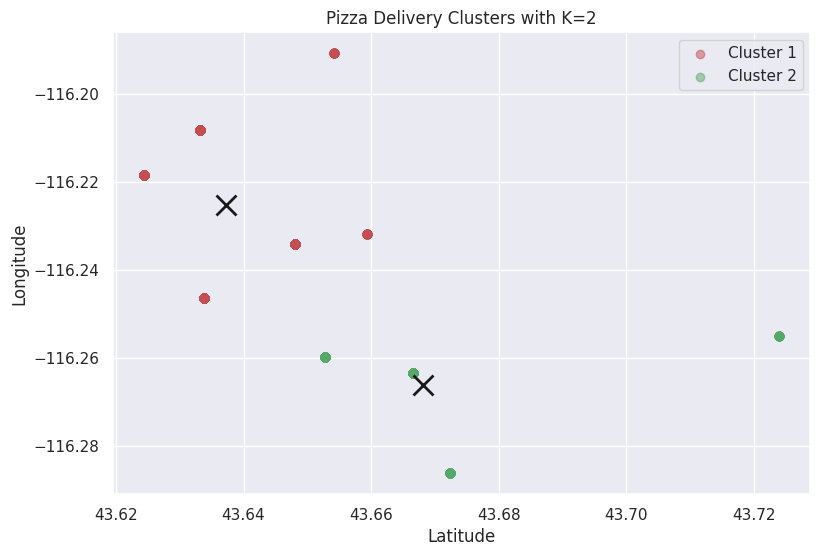

Iteration 0
Iteration 1
Iteration 2


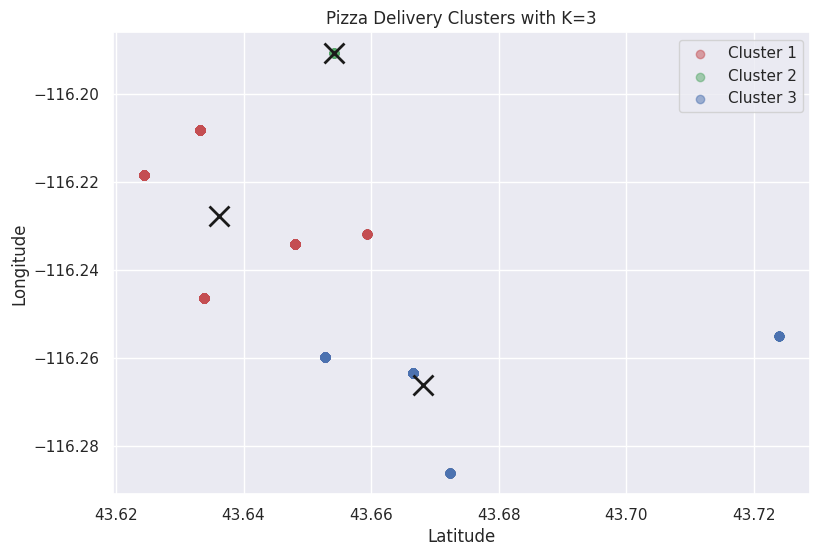

Iteration 0
Iteration 1
Iteration 2
Iteration 3


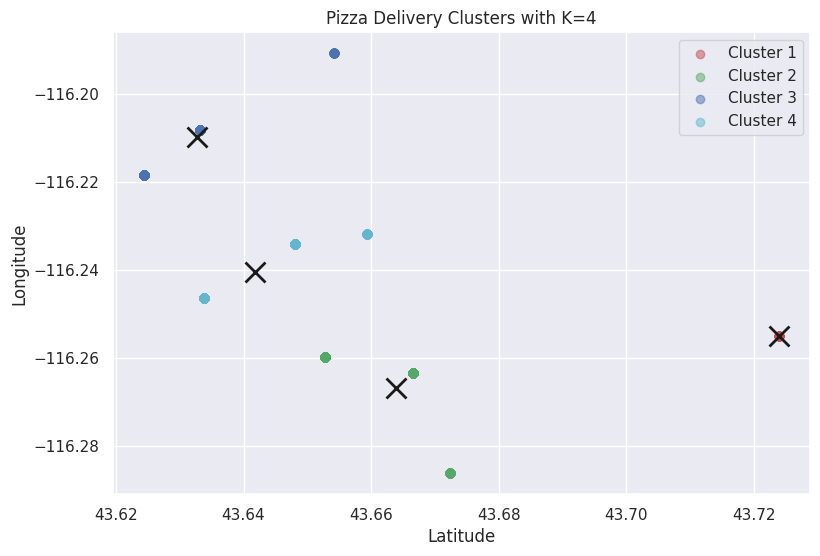

In [12]:
import matplotlib.pyplot as plt

def plot_clusters(data, bestmatches, centroids, k):
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
    plt.figure(figsize=(9, 6))

    # Plot each cluster with a different color
    for i, cluster in enumerate(bestmatches):
        if cluster:  # Ensure the cluster is not empty
            cluster_points = np.array([data[j] for j in cluster])
            if cluster_points.ndim == 1:  # If cluster has only one point, make it 2D
                cluster_points = cluster_points[np.newaxis, :]
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[i % len(colors)], alpha=0.5, label=f'Cluster {i+1}')

    # Plot centroids
    for centroid in centroids:
        plt.plot(centroid[0], centroid[1], 'kx', markersize=15, markeredgewidth=2)

    plt.title(f'Pizza Delivery Clusters with K={k}')
    plt.xlabel('Latitude')
    plt.ylabel('Longitude')
    plt.legend()
    plt.show()

for k in [2, 3, 4]:
    bestmatches = kcluster(data, k=k)
    centroids = calculate_centroids(data, bestmatches)
    plot_clusters(data, bestmatches, centroids, k)

## Examples of cluster visualization in 2D

Plotting original data:
    
<img src="clusters.png">

Plotting clusters with store locations
<img src="locations.png">

Copyright &copy; 2024 Marina Barsky. All rights reserved.